### Нежное введение в ту часть машинного обучения
#### задачи из которой решает sklearn
* Supervised learning: classification/regression
* Unsupervised learning (for structure discovery and visualization): clustering, dimensionality reduction, etc.

#### Задачи, которые обычно относят к машинному обучению -- в одной куче (wiki):
* **Classification **
* **Clustering **
* **Regression **
* Anomaly detection 
* Association rules 
* Reinforcement learning 
* Structured prediction 
* **Feature engineering **
* Feature learning 
* Online learning 
* **Semi-supervised learning** 
* **Unsupervised learning** 
* Learning to rank 
* Grammar induction

Настоятельно рекомендую ознакомиться:
https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/home/week/7
А лучше вообще пройти весь курс.

Нужно понять
1. какую задачу мы решаем;
2. как мы будем оценивать свои успехи (может, нам вовсе и не нужен машин лёрнинг?);
3. какими данными мы располагаем;
4. как именно по данным будем строить фичи (+ фичи на основе фич);
5. как отмасштабировать-отфильтровать данные, если в них есть мусор;
6. с каких моделей стоит начать;
7. как оценивать качество модели (в т.ч. случайно ли выбирать holdout).

# Supervised learning: регрессия

Восстановление численных значений зависимой переменной.
Методы решения задач регрессии (как и классификации) неплохо представлены в sklearn.

### Регуляризация
#### with one simple trick...

Введение дополнительных ограничений при обучении модели. 

Такие ограничения 
- "помогут нам выбрать одно решение из бесконечного числа" (актуально для ill-posed problems),
- ограничат "влияние" тех или иных фич; например, в линейных моделях без регуляризации большие коэффициенты при некоторых фичах свидетельствуют о переобучении
следовательно, могут спасти от переобучения.

#### L2-регуляризация, регуляризация Тихонова, shrinkage
В оптимизируемый функционал -- сумму квадратов весов при фичах. Ограничивает веса при фичах.

#### L1-регуляризация, LASSO
В оптимизируемый функционал -- сумму модулей весов при фичах. Ограничивает веса при фичах, умеет их обнулять -- feature selection.

In [23]:
from sklearn.datasets import load_diabetes
"""
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

age, sex, body mass index, average blood pressure, and six blood serum measurements 
were obtained for each of n = 442 diabetes patients, as well as the response of interest, 
a quantitative measure of disease progression one year after baseline

AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y

whereas, in the R file, they are named
age sex bmi map tc ldl hdl tch ltg glu y
"""

diabetes = load_diabetes()

X, y = diabetes.data, diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [6]:
# Да они же отмасштабированы! (даже пол)
X.mean(axis=0), X.std(axis=0)

array([ -3.63428493e-16,   1.30834257e-16,  -8.04534920e-16,
         1.28165452e-16,  -8.83531559e-17,   1.32702421e-16,
        -4.57464634e-16,   3.77730150e-16,  -3.83085422e-16,
        -3.41288202e-16])

sex
-0.044642    235
 0.050680    207
dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0500a41c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0500a41c50>)

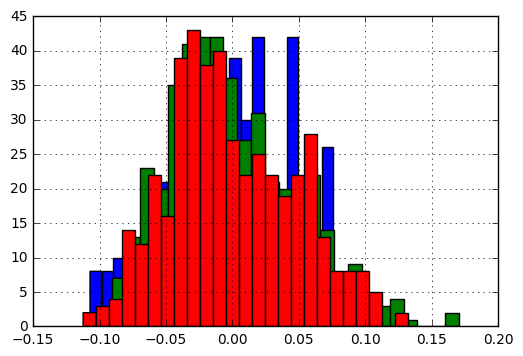

In [39]:
%matplotlib inline
import pandas as pd # kinda overkill, but who cares

df = pd.DataFrame(X, columns="age sex bmi map tc ldl hdl tch ltg glu".split(" "))

# пола действительно два!
print(df.groupby(["sex"]).size())

# а эти ребята как-то естественно распределены
df["age"].hist(bins=25), df["bmi"].hist(bins=25), df["map"].hist(bins=25)

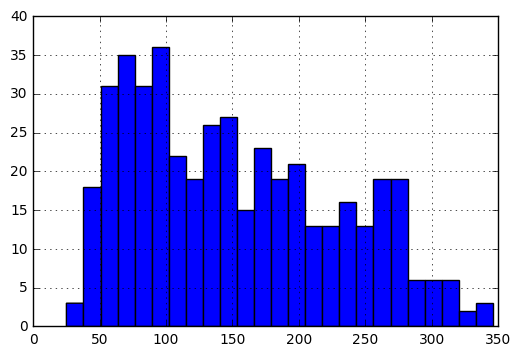

In [33]:
# оценка "прогресса" болезни
pd.Series(y).hist(bins=25)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=3)

spl = 300
lr.fit(X[:spl], y[:spl])

y_true = y[spl:]
y_pred = lr.predict(X[spl:])

"""
 Оценка качества модели: http://scikit-learn.org/stable/modules/model_evaluation.html

 Regression
 ‘neg_mean_absolute_error’      metrics.mean_absolute_error
 ‘neg_mean_squared_error’       metrics.mean_squared_error 
 ‘neg_median_absolute_error’    metrics.median_absolute_error
 ‘r2’                           metrics.r2_score
"""
            
print("MAE        ", mean_absolute_error(y_true, y_pred))
print("MSE        ", mean_squared_error(y_true, y_pred))
print("Median AE  ", median_absolute_error(y_true, y_pred))
print("R2         ", r2_score(y_true, y_pred))

y.min(), y.max()

MAE         41.2036866597
MSE         2794.5690145
Median AE   33.0233862164
R2          0.507199185219


(25.0, 346.0)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

Max score -44.4489453969 with alpha 0.020309176209


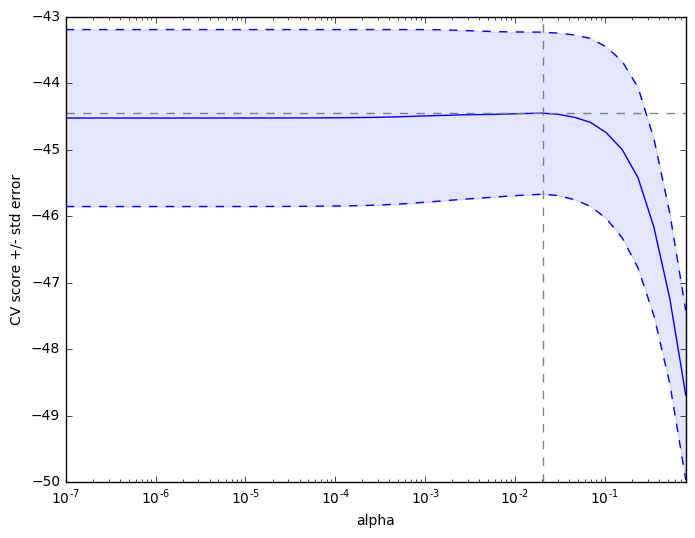

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Max score -44.4321350008 with alpha 0.0135135430893


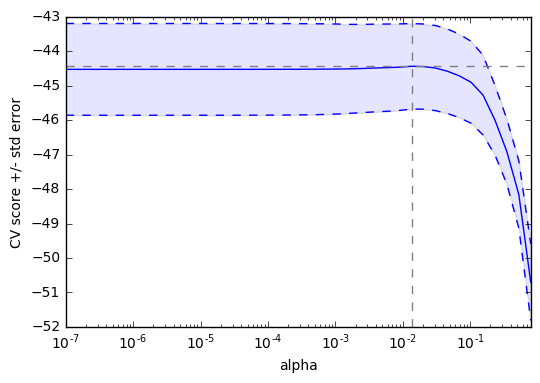

'\nАльфу приходится подбирать, если поставить "наугад" -- редко везёт. \nЕсть удобный интерфейс к подбору\nLassoCV, LassoLarsCV, ...\n(проверять после этого надо, разумеется, на отложенной выборке)\n'

In [84]:
"""
See more:
   http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py
"""
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso, LassoLars
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

           
models = [
           # "линейная регрессия с L2-регуляризацией (Тихонова)"
           Ridge(random_state=42),
    
           # "линейная регрессия с L1-регуляризатором"
           Lasso(random_state=42),
           # подставите сюда что-нибудь ещё с параметром альфа?
          ]

# параметры подобраны руками после взгляда на график на большом интервале
alphas = np.logspace(-7, -0.1, 40)

n_folds = 3

plt.figure().set_size_inches(8, 6)

# для всех линейных моделей с разными способами регуляризации
for model in models:
    
    print(model)
    
    scores = []
    stds = []

    # для всех параметров, определяющих влиятие слагаемых-регуляризаторов
    for alpha in alphas:
        model.alpha = alpha
        this_scores = cross_val_score(model, X, y, cv=n_folds, n_jobs=3, scoring="neg_mean_absolute_error")   
        
        # сохраняем оценки качества и их разброс
        scores.append(np.mean(this_scores))
        stds.append(np.std(this_scores))

    # PLOTTING =========================================================

    scores, scores_std = np.array(scores), np.array(stds)

    plt.semilogx(alphas, scores)

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, 'b--')
    plt.semilogx(alphas, scores - std_error, 'b--')

    # alpha controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.10)

    plt.ylabel('CV score +/- std error')
    plt.xlabel('alpha')

    # max score line
    print("\nMax score", np.max(scores), "with alpha", alphas[np.argmax(scores)])
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.axvline(alphas[np.argmax(scores)], linestyle='--', color='.5')

    plt.xlim([alphas[0], alphas[-1]])
    plt.show()

"""
Альфу приходится подбирать, если поставить "наугад" -- редко везёт. 
Есть удобный интерфейс к подбору
LassoCV, LassoLarsCV, ...
(проверять после этого надо, разумеется, на отложенной выборке)
"""
#

In [ ]:
# Самостоятельная работа
# Провести аналогичный анализ другим датасетом-из-коробки/
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston